<a href="https://colab.research.google.com/github/BorjaZarco/Machine-Learning-EOI/blob/master/20181113_First_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1 - First Steps

First exercises in the Machine Learning Course, in which we implemented some basic functions to practice and get to know phython and basic statistics.

## 1. Logistic Function

Implementing a logistic function in Python and visualizing the reulting graph using the ***matplotlib*** library. Once its done, it is plotted the same function in the same graph but using the ***Scipy*** (*scipy.special.expit*()) to check if our own function was correctly implemented




In [0]:
# Imports
import numpy as np
import scipy as sc
import numpy.random as npr
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

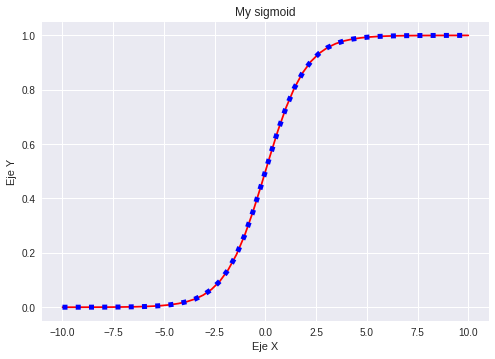

In [31]:
x = np.linspace(-10,10)

sigmoid = lambda x : 1/(1+np.exp(-x)) 

plt.title("My sigmoid")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.plot(x, sigmoid(x), c="red")
plt.plot(x, sc.special.expit(x), c="blue", ls="dotted", linewidth=5)
plt.show()

## 2. Random variables and Distributions

---

Definition of a random vairable with normal distribution, mean $\mu=5$ and variance $\sigma^2=4$.
Generation of a vector with 10000 random values using **scipy.stats.norm.rvs()**. 
Obtaining a histogram of those values and analising it to know whether it has normal distribution or not.

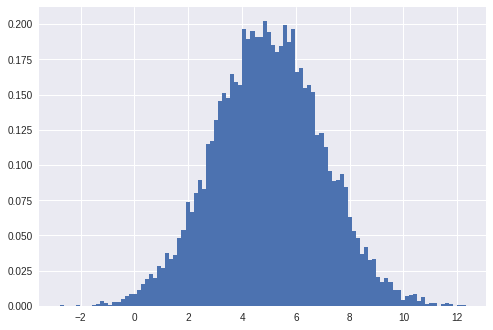

In [32]:
random_var = sc.stats.norm(loc=5, scale=np.sqrt(4))
# x = np.linspace(sc.stats.norm.ppf(0.01), sc.stats.norm.ppf(0.99), 100)

# plt.plot(x, sc.stats.norm.pdf(x))
plt.hist(random_var.rvs(10000), bins=100, density=True)
plt.show()

## 3. Exploratory Data Analysis: Iris Setosa DF


---

An exploratory data analysis divided in:

1. Table with basic statistics: for each variable, show the minimum, maximum, mean and variance. For this task, it is used the ***Numpy*** or the  **scipy.stats.describe()** libraries.

2. Histogram that shows in different colours the distributions the Petal Length of each plant

3. A scatter plot of the Sepal Length and the Petal Width 

In [33]:
# LOAD DATA

iris = load_iris()

X = iris.data
Y = iris.target

# 1

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

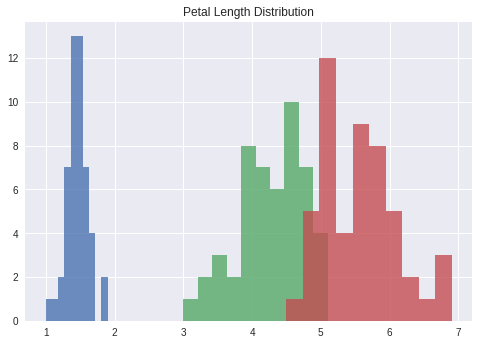

In [34]:
# 2

PETAL_LENGTH_COL=2

PETAL_LENGTH= [X[Y==0,2], X[Y==1,2], X[Y==2,2]]

for flower in PETAL_LENGTH:
  plt.hist(flower, alpha=0.8)

plt.title("Petal Length Distribution")
plt.show()

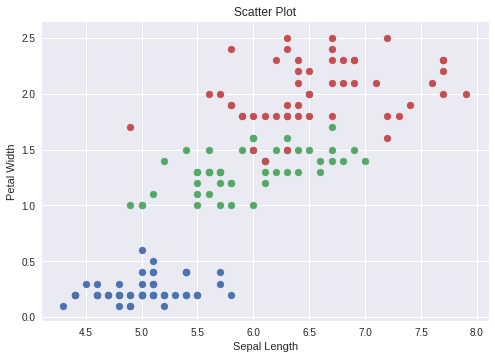

In [35]:
# 3

SEPAL_LENGTH = [X[Y==0,0], X[Y==1,0], X[Y==2,0]]
PETAL_WIDTH = [X[Y==0,3], X[Y==1,3], X[Y==2,3]]

plt.title("Scatter Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")

for i in range(0,3):
  plt.scatter(SEPAL_LENGTH[i], PETAL_WIDTH[i])

## 4. Monty Hall Problem Simulation. (Bonus)

The Monty Hall problem consists in three doors. Behind two of them there is a goat, and the remaining one has a luxurious car. Initially we select one of the doors randomly. Then the anchor will open a door from the remaining two and will give you the opportunity of selecting the door left or sticking with the one you chose previously. 

https://en.wikipedia.org/wiki/Monty_Hall_problem

There is solid evidence that the correct option is to choose to change your starting option, but there is the resolution and proof that the probability laws are always true.

---
1. Initialising the game

2. Random initial selection

3. Open one of the doors that has a GOAT and isnt opened yet

4. Assuming that we always change the initial choice

5. Repeating the simulation and counting the times we "win" the car

6. Calculate the probability and check that it actually is aprox. 66.67% (2/3)

Using **numpy.random** to tackle the problem.


Probability to succeed over 10000 attempts: 0.67


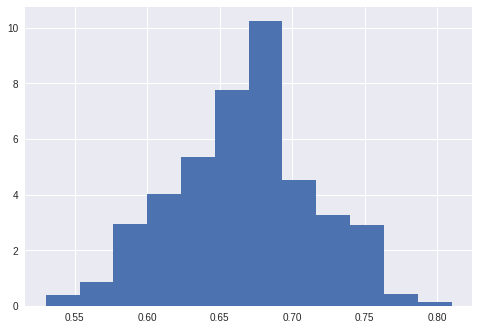

[0.62, 0.68, 0.67, 0.71, 0.74, 0.66, 0.63, 0.65, 0.65]
[0.7, 0.75, 0.65, 0.64, 0.55, 0.65, 0.72, 0.63, 0.64]


In [36]:
# import numpy as np
# import matplotlib.pyplot as plt

doors = ["Car", "Goat", "Goat"]

def play():
  wins = 0
  for i in range(0, 100):
    npr.shuffle(doors)
    choices=[0,1,2]
    first_choice = npr.randint(0,3)
    choices.remove(first_choice)
   
    doors_to_show=[]
    for i in choices:
      if doors[i] == "Goat":
        door_to_show=i
    
    choices.remove(door_to_show)
    final_choice=doors[choices[0]]
    
    if final_choice == "Car":
      wins=wins+1
  return wins/100

totalplays=[]
for i in range(0,1000):
  prob_to_win = play()
  totalplays.append(prob_to_win)
print('Probability to succeed over', str(10000), 'attempts:', str(round(np.mean(totalplays), 2)))

plt.hist(totalplays, bins=12, density=True)     
plt.show()
print(totalplays[1:10])
print(totalplays[-10:-1])